In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def upload_data(df, file_path):
    df.to_csv(file_path, index=False)

In [3]:
def extract_competitor_states(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df = df.iloc[1:14, ]
    df[['Goals_Scored', 'Goals_Conceded']] = df['Goals'].str.split(':', expand=True)
    df= df.iloc[0:14, [0,4,5,6,-5,-4,-3,-2,-1]]
    return df

In [4]:
def extract_team_states(team_name, input_dataframe, scored_goals, conceded_goals, points, win, draw, lose):
    df = input_dataframe
    
    # Clean the data by converting columns to numeric, and invalid entries to NaN
    df[scored_goals] = pd.to_numeric(df[scored_goals], errors='coerce')
    df[conceded_goals] = pd.to_numeric(df[conceded_goals], errors='coerce')
    df[points] = pd.to_numeric(df[points], errors='coerce')
    df[win] = pd.to_numeric(df[win], errors='coerce')
    df[draw] = pd.to_numeric(df[draw], errors='coerce')
    df[lose] = pd.to_numeric(df[lose], errors='coerce')

    print("Team Name : ", team_name)    
    # Team Statistics 
    print("Total Scored Goals : ", np.nansum(df[scored_goals]))
    print("Total Conceded Goals : ", np.nansum(df[conceded_goals]))
    print("+\- : ", np.nansum(df[scored_goals]) - np.nansum(df[conceded_goals]))
    print("Total Points from Season 2011-2012:2023-2024 : " , np.nansum(df[points]))
    print("AVG Points/Season from Season 2011-2012:2023-2024 : " , round(np.nanmean(df[points]), 2))
    print("Season That Team Gained Max Points from Season 2011-2012:2023-2024 :", df.loc[df[points].idxmax(), 'Season'])
    print("Season That Team Gained Min Points from Season 2011-2012:2023-2024 :", df.loc[df[points].idxmin(), 'Season'])
    print("Total Wins : ", np.nansum(df[win]))
    print("Average Wins/Season : ", round(np.nanmean(df[win]), 2))
    print("Total Draws : ", np.nansum(df[draw]))
    print("Average Draw/Season : ", round(np.nanmean(df[draw]), 2))
    print("Total Losses : ", np.nansum(df[lose]))
    print("Average Losses/Season : ", round(np.nanmean(df[lose]), 2))

### Atleti vs Barca vs real madrid in laliga from 2011 : 2014 

### Barca 2011:2024

In [5]:
barca_states = extract_competitor_states('text data barca real fbreq/barca.txt')
barca_states

,Season,W,D,L,Points,Rank,Manager,Goals_Scored,Goals_Conceded
1,23/24,26,7,5,85,2,Xavi,79,44
2,22/23,28,4,6,88,1,Xavi,70,20
3,21/22,21,10,7,73,2,Xavi,68,38
4,20/21,24,7,7,79,3,Ronald Koeman,85,38
5,19/20,25,7,6,82,2,Quique Setién,86,38
6,18/19,26,9,3,87,1,Ernesto Valverde,90,36
7,17/18,28,9,1,93,1,Ernesto Valverde,99,29
8,16/17,28,6,4,90,2,Luis Enrique,116,37
9,15/16,29,4,5,91,1,Luis Enrique,112,29
10,14/15,30,4,4,94,1,Luis Enrique,110,21


### Real Madrid 2011:2024

In [6]:
madrid_states = extract_competitor_states('text data barca real fbreq/real_madrid.txt')
madrid_states

,Season,W,D,L,Points,Rank,Manager,Goals_Scored,Goals_Conceded
1,23/24,29,8,1,95,1,Carlo Ancelotti,87,26
2,22/23,24,6,8,78,2,Carlo Ancelotti,75,36
3,21/22,26,8,4,86,1,Carlo Ancelotti,80,31
4,20/21,25,9,4,84,2,Zinédine Zidane,67,28
5,19/20,26,9,3,87,1,Zinédine Zidane,70,25
6,18/19,21,5,12,68,3,Zinédine Zidane,63,46
7,17/18,22,10,6,76,3,Zinédine Zidane,94,44
8,16/17,29,6,3,93,1,Zinédine Zidane,106,41
9,15/16,28,6,4,90,2,Zinédine Zidane,110,34
10,14/15,30,2,6,92,2,Carlo Ancelotti,118,38


In [7]:
atleti = pd.read_csv('processed data/atelti_statistics_after_simone.csv')

In [8]:
atleti

,Division,Pld,W,D,L,GF,GA,Pts,Pos,Cup[1],...,LC,CL[3],UC[4],CW,IC,SC[5],CWC[6],Player(s),Goals,season
0,La Liga,38,15,11,12,53,46,56,5th,R32,...,NaN,NaN,W,NaN,NaN,NaN,NaN,Radamel Falcao,36,2011–12
1,La Liga,38,23,7,8,65,31,76,3rd,W,...,NaN,NaN,R32,NaN,NaN,W,NaN,Radamel Falcao,34,2012–13
2,La Liga,38,28,6,4,77,26,90,W,SF,...,NaN,RU,NaN,NaN,NaN,NaN,NaN,Diego Costa,36,2013–14
3,La Liga,38,23,9,6,67,29,78,3rd,QF,...,NaN,QF,NaN,NaN,NaN,NaN,NaN,Antoine Griezmann,25,2014–15
4,La Liga,38,28,4,6,63,18,88,3rd,QF,...,NaN,RU,NaN,NaN,NaN,NaN,NaN,Antoine Griezmann,32,2015–16
5,La Liga,38,23,9,6,70,27,78,3rd,SF,...,NaN,SF,NaN,NaN,NaN,NaN,NaN,Antoine Griezmann,26,2016–17
6,La Liga,38,23,10,5,58,22,79,2nd,QF,...,NaN,GS,W,NaN,NaN,NaN,NaN,Antoine Griezmann,29,2017–18
7,La Liga,38,22,10,6,55,29,76,2nd,R16,...,NaN,R16,NaN,NaN,NaN,W,NaN,Antoine Griezmann,21,2018–19
8,La Liga,38,18,16,4,51,27,70,3rd,R32,...,NaN,QF,NaN,NaN,NaN,NaN,NaN,Álvaro Morata,16,2019–20
9,La Liga,38,26,8,4,67,25,86,W,2R,...,NaN,R16,NaN,NaN,NaN,NaN,NaN,Luis Suárez,21,2020–21


In [9]:
 # handling inconsistency in season feature 

In [10]:
atleti = atleti.sort_values(by='season', ascending=False)

In [11]:
atleti

,Division,Pld,W,D,L,GF,GA,Pts,Pos,Cup[1],...,LC,CL[3],UC[4],CW,IC,SC[5],CWC[6],Player(s),Goals,season
12,La Liga,38,24,4,10,70,43,76,4th,SF,...,NaN,QF,NaN,NaN,NaN,NaN,NaN,Antoine Griezmann,24,2023–24
11,La Liga,38,23,8,7,70,33,77,3rd,QF,...,NaN,GS,NaN,NaN,NaN,NaN,NaN,Antoine Griezmann,16,2022–23
10,La Liga,38,21,8,9,65,43,71,3rd,R16,...,NaN,QF,NaN,NaN,NaN,NaN,NaN,Ángel Correa Luis Suárez,13,2021–22
9,La Liga,38,26,8,4,67,25,86,W,2R,...,NaN,R16,NaN,NaN,NaN,NaN,NaN,Luis Suárez,21,2020–21
8,La Liga,38,18,16,4,51,27,70,3rd,R32,...,NaN,QF,NaN,NaN,NaN,NaN,NaN,Álvaro Morata,16,2019–20
7,La Liga,38,22,10,6,55,29,76,2nd,R16,...,NaN,R16,NaN,NaN,NaN,W,NaN,Antoine Griezmann,21,2018–19
6,La Liga,38,23,10,5,58,22,79,2nd,QF,...,NaN,GS,W,NaN,NaN,NaN,NaN,Antoine Griezmann,29,2017–18
5,La Liga,38,23,9,6,70,27,78,3rd,SF,...,NaN,SF,NaN,NaN,NaN,NaN,NaN,Antoine Griezmann,26,2016–17
4,La Liga,38,28,4,6,63,18,88,3rd,QF,...,NaN,RU,NaN,NaN,NaN,NaN,NaN,Antoine Griezmann,32,2015–16
3,La Liga,38,23,9,6,67,29,78,3rd,QF,...,NaN,QF,NaN,NaN,NaN,NaN,NaN,Antoine Griezmann,25,2014–15


In [12]:
## Comparting between Barca, Atleti & Real Madrid in total scored goals from 2011:2024

In [13]:
dict_points = { 'season' : list(atleti['season']),
                'Atletico': list(atleti['GF']),
                'Real Madrid': list(madrid_states['Goals_Scored']), 
                'Barca': list(barca_states['Goals_Scored']) }  


In [14]:
atleti_barca_real_scored_goals = pd.DataFrame(dict_points)

In [15]:
atleti_barca_real_scored_goals

,season,Atletico,Real Madrid,Barca
0,2023–24,70,87,79
1,2022–23,70,75,70
2,2021–22,65,80,68
3,2020–21,67,67,85
4,2019–20,51,70,86
5,2018–19,55,63,90
6,2017–18,58,94,99
7,2016–17,70,106,116
8,2015–16,63,110,112
9,2014–15,67,118,110


In [16]:
## Checking Data 

In [17]:
atleti_barca_real_scored_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   season       13 non-null     object
 1   Atletico     13 non-null     int64 
 2   Real Madrid  13 non-null     object
 3   Barca        13 non-null     object
dtypes: int64(1), object(3)
memory usage: 548.0+ bytes


In [18]:
## Process Data 

In [19]:
atleti_barca_real_scored_goals.columns = atleti_barca_real_scored_goals.columns.str.strip()

In [20]:
atleti_barca_real_scored_goals['Real Madrid'] = pd.to_numeric(
    atleti_barca_real_scored_goals['Real Madrid'], errors='coerce')
atleti_barca_real_scored_goals['Barca'] = pd.to_numeric(
    atleti_barca_real_scored_goals['Barca'], errors='coerce')

In [21]:
print(atleti_barca_real_scored_goals.dtypes)

season         object
Atletico        int64
Real Madrid     int64
Barca           int64
dtype: object


In [22]:
## Extarct the needed statistics fron the prevous data frame 

In [23]:
## Total Goals scored by atleti, barca, real from 2011–12 : 2023–24	

In [24]:
print('Atleti Total Goals : ', sum(atleti_barca_real_scored_goals['Atletico']))
print('Barca Total Goals  : ', sum(atleti_barca_real_scored_goals['Barca']))
print('Madrid Total Goals : ', sum(atleti_barca_real_scored_goals['Real Madrid']))

Atleti Total Goals :  831
Barca Total Goals  :  1244
Madrid Total Goals :  1198


In [25]:
points_dicts = {'Season': list(atleti['season']),
               'Atletico Points' : list(atleti['Pts']),
               'Barca Points': list(barca_states['Points']),
               'Real Points' : list(madrid_states['Points'])
               }

In [26]:
points_df = pd.DataFrame(points_dicts)

In [27]:
points_df

,Season,Atletico Points,Barca Points,Real Points
0,2023–24,76,85,95
1,2022–23,77,88,78
2,2021–22,71,73,86
3,2020–21,86,79,84
4,2019–20,70,82,87
5,2018–19,76,87,68
6,2017–18,79,93,76
7,2016–17,78,90,93
8,2015–16,88,91,90
9,2014–15,78,94,92


In [28]:
points_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season           13 non-null     object
 1   Atletico Points  13 non-null     int64 
 2   Barca Points     13 non-null     object
 3   Real Points      13 non-null     object
dtypes: int64(1), object(3)
memory usage: 548.0+ bytes


In [29]:
points_df['Barca Points'] = pd.to_numeric(points_df['Barca Points'], errors='coerce')
points_df['Real Points'] = pd.to_numeric(points_df['Real Points'], errors='coerce')

In [30]:
need_points_by_atleti = []
laliga_winner = []

for i in range (0, points_df.shape[0],1) :
    
    if points_df['Atletico Points'][i] > max(points_df['Barca Points'][i],points_df['Real Points'][i]) :
        need_points_by_atleti.append(points_df['Atletico Points'][i] - max(points_df['Barca Points'][i],points_df['Real Points'][i]))
        laliga_winner.append("Atletico")
        
    elif points_df['Atletico Points'][i] < max(points_df['Barca Points'][i],points_df['Real Points'][i]) :
        if points_df['Barca Points'][i]> points_df['Real Points'][i]:    
            need_points_by_atleti.append(-1*(max(points_df['Barca Points'][i],points_df['Real Points'][i])-points_df['Atletico Points'][i]))
            laliga_winner.append("Barca")
            
        elif points_df['Barca Points'][i]< points_df['Real Points'][i]: 
            need_points_by_atleti.append(-1*(max(points_df['Barca Points'][i],points_df['Real Points'][i])-points_df['Atletico Points'][i]))
            laliga_winner.append("Real Madrid")

In [31]:
points_df['Laliga Winner pts - Atleti pts'] = pd.Series(list(need_points_by_atleti))
points_df['Laliga Winner'] = pd.Series(list(laliga_winner))

In [32]:
points_df

,Season,Atletico Points,Barca Points,Real Points,Laliga Winner pts - Atleti pts,Laliga Winner
0,2023–24,76,85,95,-19,Real Madrid
1,2022–23,77,88,78,-11,Barca
2,2021–22,71,73,86,-15,Real Madrid
3,2020–21,86,79,84,2,Atletico
4,2019–20,70,82,87,-17,Real Madrid
5,2018–19,76,87,68,-11,Barca
6,2017–18,79,93,76,-14,Barca
7,2016–17,78,90,93,-15,Real Madrid
8,2015–16,88,91,90,-3,Barca
9,2014–15,78,94,92,-16,Barca


In [33]:
points_df.to_csv('processed data/atleti_barca_madrid_laliga.csv', index=False)

## Visualizing the previous statistics using Google looker Studio

In [34]:
def show_image(image_path):
    img_path = image_path
    
    img1 = mpimg.imread(img_path)
    fig, ax = plt.subplots(figsize=(10, 9))
    ax.imshow(img1)
    ax.axis("off")  
    plt.show()  

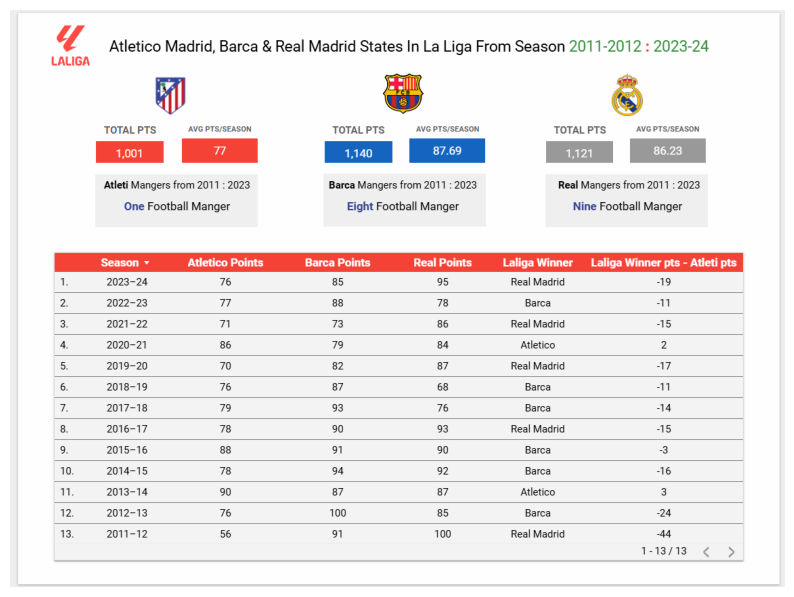

In [35]:
show_image('images/atleti_barca_madrid_laliga_1.png')

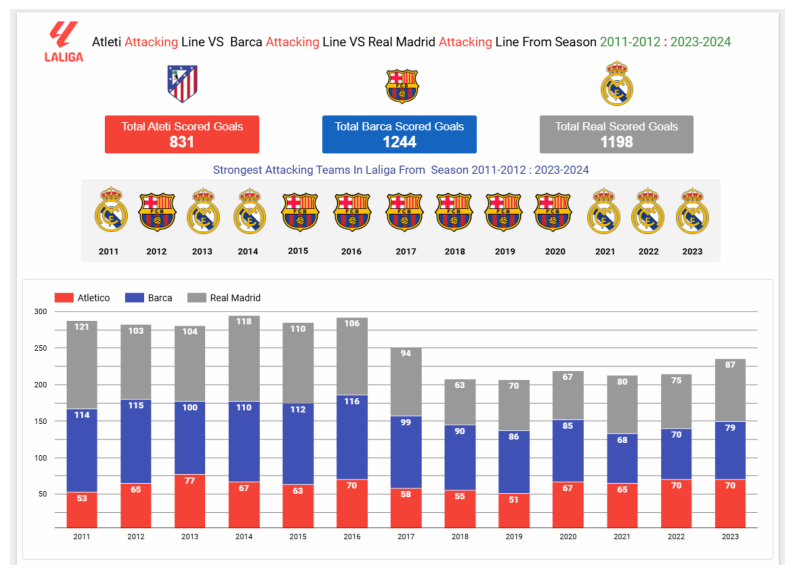

In [36]:
show_image('images/atelti_barca_madrid_laiga_2.png')

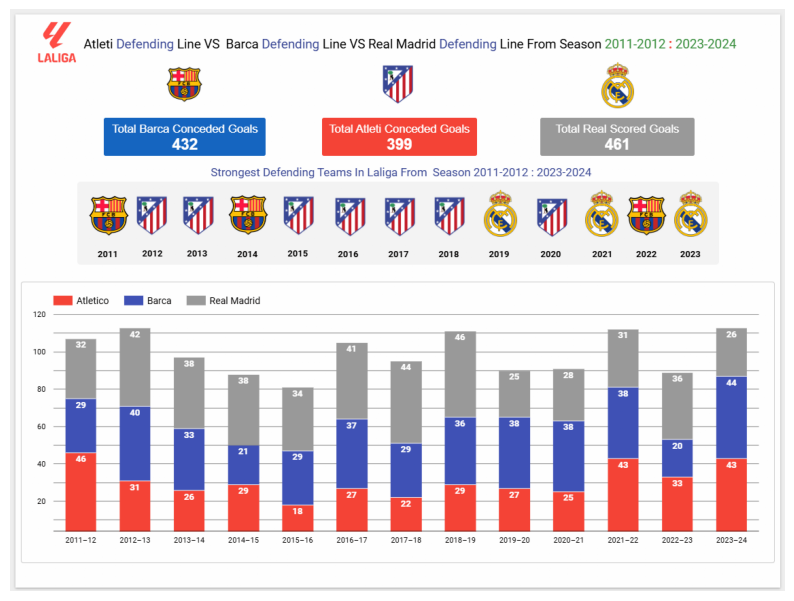

In [37]:
show_image('images/atleti_barca_madrid_laliga_3.png')

In [38]:
extract_team_states("Barca", barca_states, 'Goals_Scored', 'Goals_Conceded', 'Points', 'W', 'D', 'L')

Team Name :  Barca
Total Scored Goals :  1244
Total Conceded Goals :  432
+\- :  812
Total Points from Season 2011-2012:2023-2024 :  1140
AVG Points/Season from Season 2011-2012:2023-2024 :  87.69
Season That Team Gained Max Points from Season 2011-2012:2023-2024 : 12/13
Season That Team Gained Min Points from Season 2011-2012:2023-2024 : 21/22
Total Wins :  352
Average Wins/Season :  27.08
Total Draws :  84
Average Draw/Season :  6.46
Total Losses :  58
Average Losses/Season :  4.46


In [39]:
extract_team_states("Real Madrid", madrid_states, 'Goals_Scored', 'Goals_Conceded', 'Points', 'W', 'D', 'L')

Team Name :  Real Madrid
Total Scored Goals :  1198
Total Conceded Goals :  461
+\- :  737
Total Points from Season 2011-2012:2023-2024 :  1121
AVG Points/Season from Season 2011-2012:2023-2024 :  86.23
Season That Team Gained Max Points from Season 2011-2012:2023-2024 : 11/12
Season That Team Gained Min Points from Season 2011-2012:2023-2024 : 18/19
Total Wins :  345
Average Wins/Season :  26.54
Total Draws :  86
Average Draw/Season :  6.62
Total Losses :  63
Average Losses/Season :  4.85


In [40]:
print('Team Name : Atletico De Madrid')
print('Total Scored Goals :', np.sum(atleti['GF']))
print('Total Conceded Goals :', np.sum(atleti['GA']))
print('+\- :', np.sum(atleti['GF'])-np.sum(atleti['GA']))
print('Total Points from Season 2011-2012:2023-2024 :', np.sum(atleti['Pts']))
print('AVG Points/Season from Season 2011-2012:2023-2024 :', np.mean(atleti['Pts']))
print('Season That Team Gained Max Points from Season 2011-2012:2023-2024 :', np.max(atleti['Pts']))
print('Season That Team Gained Min Points from Season 2011-2012:2023-2024 :', np.min(atleti['Pts']))
print('Total Wins :', np.sum(atleti['W']))
print('Average Wins/Season :', round(np.mean(atleti['W']),2))
print('Total Wins :', np.sum(atleti['W']))
print('Average Wins/Season :', round(np.mean(atleti['W']),2))
print('Total Draws :', np.sum(atleti['D']))
print('Average Draws/Season :', round(np.mean(atleti['D']),2))
print('Total Losses :', np.sum(atleti['L']))
print('Average Losses/Season :', round(np.mean(atleti['L']),2))

Team Name : Atletico De Madrid
Total Scored Goals : 831
Total Conceded Goals : 399
+\- : 432
Total Points from Season 2011-2012:2023-2024 : 1001
AVG Points/Season from Season 2011-2012:2023-2024 : 77.0
Season That Team Gained Max Points from Season 2011-2012:2023-2024 : 90
Season That Team Gained Min Points from Season 2011-2012:2023-2024 : 56
Total Wins : 297
Average Wins/Season : 22.85
Total Wins : 297
Average Wins/Season : 22.85
Total Draws : 110
Average Draws/Season : 8.46
Total Losses : 87
Average Losses/Season : 6.69
